/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.0855 - loss: 1.9900 - val_accuracy: 0.0938 - val_loss: 1.9292
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1822 - loss: 1.9071 - val_accuracy: 0.1562 - val_loss: 1.9086
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2138 - loss: 1.8810 - val_accuracy: 0.2812 - val_loss: 1.8841
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2920 - loss: 1.8544 - val_accuracy: 0.4062 - val_loss: 1.8386
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3659 - loss: 1.7982 - val_accuracy: 0.5312 - val_loss: 1.7465
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4864 - loss: 1.7061 - val_accuracy: 0.6250 - val_loss: 1.6345
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5465 - loss: 1.6764 - val_accuracy: 0.6250 - val_loss: 1.5278
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5311 - loss: 1.5034 - val_accuracy: 0.6250 - val_loss: 1.4299
Epoch 9

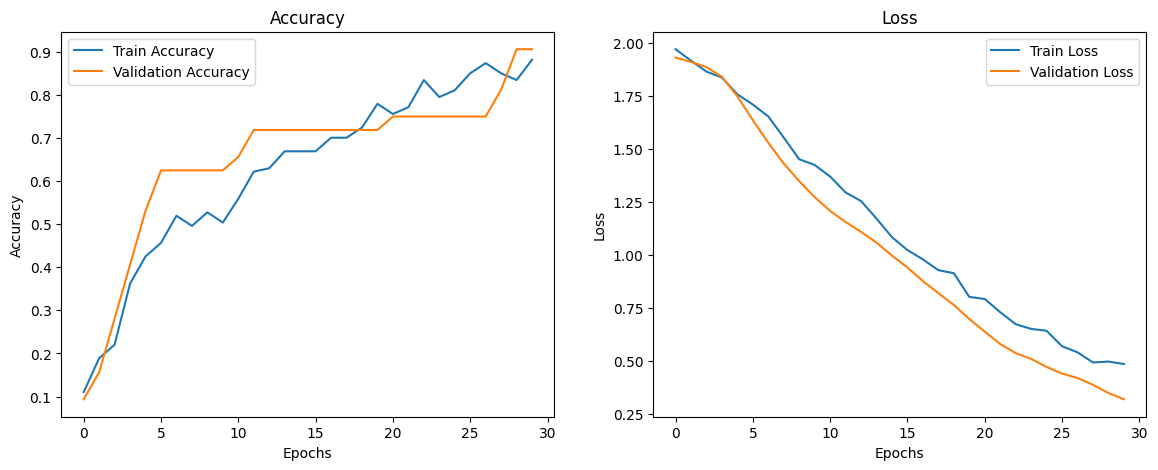

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# 1. Загрузка данных
url = "https://github.com/ybifoundation/Dataset/raw/main/Fish.csv"
data = pd.read_csv(url)

# 2. Предобработка данных
# Кодируем категориальные данные
data['Species'] = LabelEncoder().fit_transform(data['Species'])

# Разделяем на признаки и метки
X = data.drop(columns='Species')
y = data['Species']

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создание модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(len(data['Species'].unique()), activation='softmax')  # для классификации
])

# 4. Компиляция и обучение
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16)

# 5. Анализ результатов
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()



Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.0784 - loss: 1.9613 - val_accuracy: 0.0938 - val_loss: 1.9059
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1757 - loss: 1.8970 - val_accuracy: 0.3438 - val_loss: 1.8610
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4347 - loss: 1.8256 - val_accuracy: 0.3125 - val_loss: 1.8148
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4034 - loss: 1.7907 - val_accuracy: 0.3125 - val_loss: 1.7718
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4451 - loss: 1.7506 - val_accuracy: 0.3125 - val_loss: 1.7290
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4399 - loss: 1.6884 - val_accuracy: 0.3125 - val_loss: 1.6818
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4472 - loss: 1.6436 - val_accuracy: 0.3125 - val_loss: 1.6292
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4087 - loss: 1.6049 - val_accuracy: 0.3125 - val_loss: 1.5815

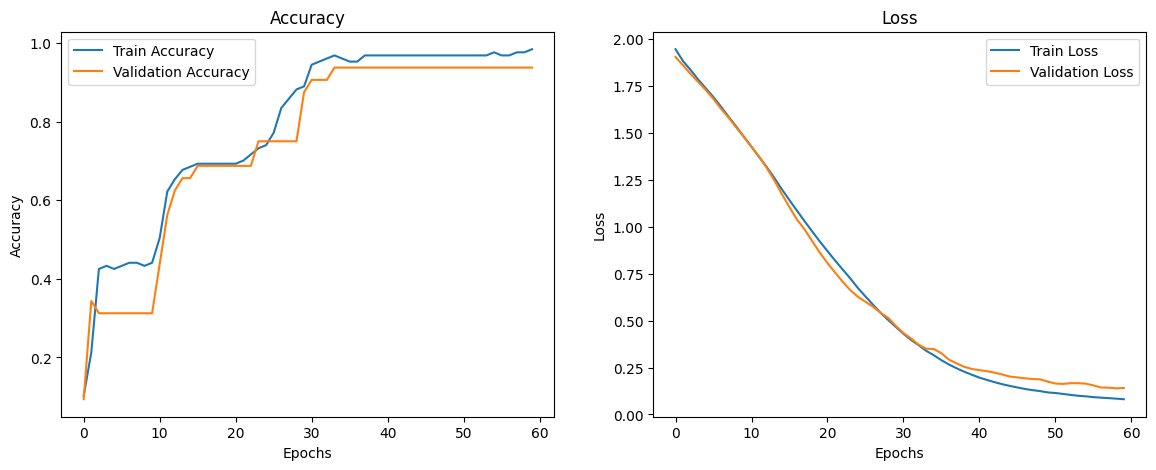

In [ ]:
#Добавим количество эпох

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Создание модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    Dense(32, activation='relu'),

    Dense(16, activation='relu'),
    Dense(len(data['Species'].unique()), activation='softmax')  # для классификации
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=60, batch_size=32)


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()



Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2140 - loss: 1.9193 - val_accuracy: 0.5312 - val_loss: 1.6967
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4726 - loss: 1.7222 - val_accuracy: 0.6875 - val_loss: 1.5257
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5111 - loss: 1.5987 - val_accuracy: 0.6250 - val_loss: 1.3688
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5885 - loss: 1.4497 - val_accuracy: 0.6250 - val_loss: 1.1872
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6397 - loss: 1.3176 - val_accuracy: 0.6875 - val_loss: 1.0200
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6930 - loss: 1.1653 - val_accuracy: 0.8438 - val_loss: 0.8936
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7156 - loss: 1.0822 - val_accuracy: 0.8750 - val_loss: 0.8083
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 - loss: 0.9677 - val_accuracy: 0.8750 - val_loss: 0.7548
Epoch 9/40
8/8 ━━━

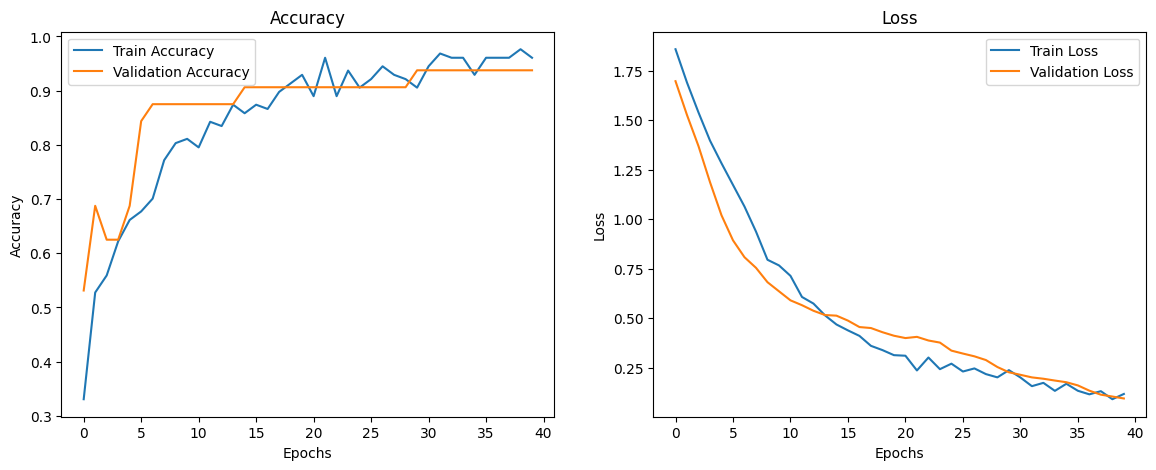

In [ ]:
# меняем нейроны и слои

# Разделяем на признаки и метки
X = data.drop(columns='Species')
y = data['Species']

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Увеличили количество нейронов
    Dropout(0.2),  # Увеличили Dropout для регуляризации

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.1),

    Dense(len(data['Species'].unique()), activation='softmax')  # Для классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=16)



plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3371 - loss: 1.8991 - val_accuracy: 0.6250 - val_loss: 1.7053
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5250 - loss: 1.7297 - val_accuracy: 0.6250 - val_loss: 1.5190
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5601 - loss: 1.5699 - val_accuracy: 0.6875 - val_loss: 1.3253
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6956 - loss: 1.3612 - val_accuracy: 0.6875 - val_loss: 1.1200
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7784 - loss: 1.2183 - val_accuracy: 0.8750 - val_loss: 0.9482
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7515 - loss: 1.0912 - val_accuracy: 0.8750 - val_loss: 0.7993
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7443 - loss: 0.9863 - val_accuracy: 0.8750 - val_loss: 0.7236
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7965 - loss: 0.8504 - val_accuracy: 0.8750 - val_loss: 0.6294
Epoch 9/30
8/8 ━━━

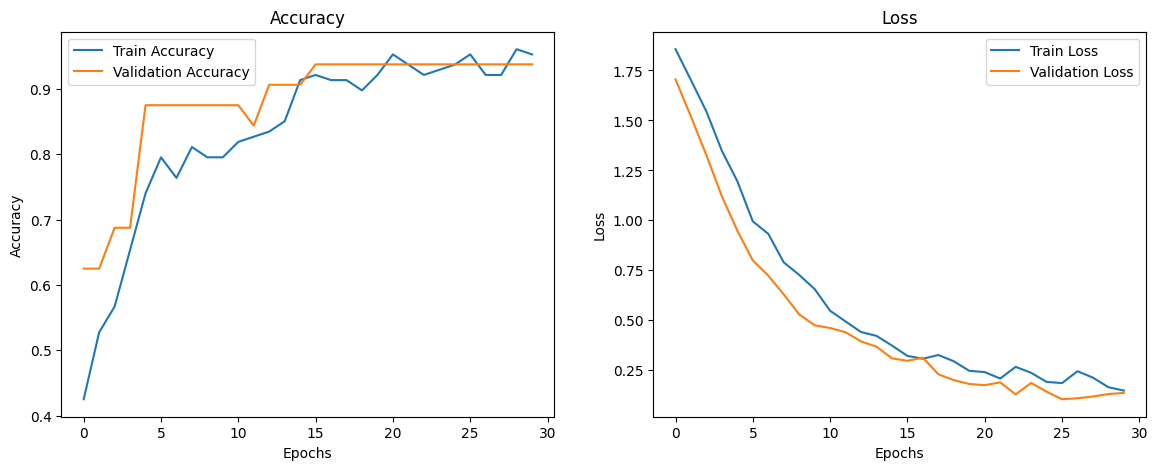

In [ ]:
# меняем случайный выкид
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Увеличили количество нейронов
    Dropout(0.2),  # Увеличили Dropout для регуляризации

    Dense(64, activation='relu'),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dropout(0.1),

    Dense(len(data['Species'].unique()), activation='softmax')  # Для классификации
])

# Компиляция модели
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Обучение
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16)



plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1122 - loss: 1.9926 - val_accuracy: 0.0769 - val_loss: 1.8662 - learning_rate: 0.0010
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2750 - loss: 1.7521 - val_accuracy: 0.4615 - val_loss: 1.7318 - learning_rate: 0.0010
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4073 - loss: 1.6914 - val_accuracy: 0.9231 - val_loss: 1.6233 - learning_rate: 0.0010
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6131 - loss: 1.5795 - val_accuracy: 0.9231 - val_loss: 1.5125 - learning_rate: 0.0010
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7054 - loss: 1.4650 - val_accuracy: 0.9231 - val_loss: 1.4083 - learning_rate: 0.0010
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6960 - loss: 1.4034 - val_accuracy: 0.9231 - val_loss: 1.3159 - learning_rate: 0.0010
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6531 - loss: 1.3809 - val_accuracy: 0.9231 - val_loss: 1.249

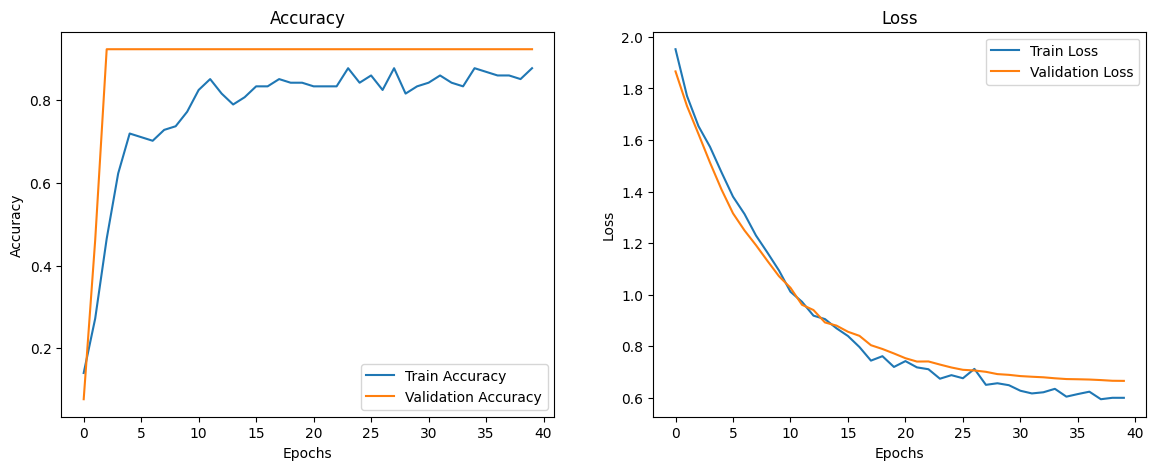

In [18]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

# 1. Загрузка данных
url = "https://github.com/ybifoundation/Dataset/raw/main/Fish.csv"
data = pd.read_csv(url)

# 2. Предобработка данных
data['Species'] = LabelEncoder().fit_transform(data['Species'])
X = data.drop(columns='Species')
y = data['Species']

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для динамического изменения learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

# 4. Создание модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(len(data['Species'].unique()), activation='softmax')
])

# 5. Компиляция и обучение модели с RMSprop
rmsprop = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.1, epochs=40, batch_size=16, callbacks=[lr_scheduler])

# Сохранение модели в формате Keras
model.save('model.keras')

# Сохранение модели в формате SavedModel
model.export('saved_model')

# 7. Анализ результатов
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/8 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step - accuracy: 0.0625 - loss: 2.1733
Epoch 1: saving model to model_epoch.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.1675 - loss: 1.9785 - val_accuracy: 0.7692 - val_loss: 1.6389 - learning_rate: 0.0010
Epoch 2/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4375 - loss: 1.7611
Epoch 2: saving model to model_epoch.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4824 - loss: 1.7025 - val_accuracy: 0.9231 - val_loss: 1.5028 - learning_rate: 0.0010
Epoch 3/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 1.6156
Epoch 3: saving model to model_epoch.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5270 - loss: 1.6068 - val_accuracy: 0.9231 - val_loss: 1.4062 - learning_rate: 0.0010
Epoch 4/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8750 - loss: 1.3990
Epoch 4: saving model to model_epoch.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7450 - loss: 1.4094 - val_accuracy: 0.92

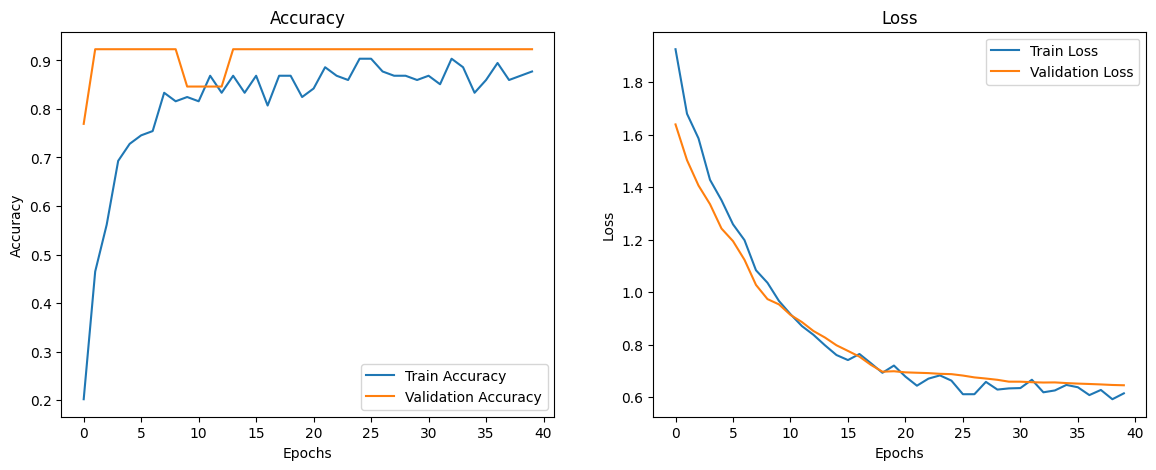

In [11]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

# 1. Загрузка данных
url = "https://github.com/ybifoundation/Dataset/raw/main/Fish.csv"
data = pd.read_csv(url)

# 2. Предобработка данных
data['Species'] = LabelEncoder().fit_transform(data['Species'])
X = data.drop(columns='Species')
y = data['Species']

# Стандартизация данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение на обучающую, тестовую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Функция для статического изменения learning rate
def scheduler(epoch, lr):
    # Изменяем learning rate после каждой 10-й эпохи
    if epoch < 10:
        return lr
    elif epoch < 20:
        return 0.0005  # Понижаем скорость обучения на 50% после 10-й эпохи
    elif epoch < 30:
        return 0.0001  # Понижаем скорость обучения ещё раз после 20-й эпохи
    else:
        return 0.00005  # Дополнительное понижение после 30-й эпохи


lr_scheduler = LearningRateScheduler(scheduler)

# 4. Создание модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(len(data['Species'].unique()), activation='softmax')
])

# 5. Компиляция и обучение модели с RMSprop
rmsprop = RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

best = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)
epoch_save = ModelCheckpoint('model_epoch.keras', save_freq='epoch', verbose=1)

history = model.fit(X_train, y_train,validation_split=0.1,epochs=40,batch_size=16,callbacks=[lr_scheduler,best,epoch_save])

# Сохранение модели в формате Keras
model.save('model.keras')

# Сохранение модели в формате SavedModel
model.export('saved_model')

# 7. Анализ результатов
plt.figure(figsize=(14, 5))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()
